## Text Classification using Keras

### Dataset: Reuters

In [30]:
from keras.datasets import reuters
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
% matplotlib inline

1. *max_words* defines the maximum number of words to be taken into consideration in each article
2. *batch_size* defines the number of articles to be trained on in one go
3. *nb_epoch* defines the total number of times one wants to fit the model

In [31]:
max_words = 1000
batch_size = 32
nb_epoch = 100

In [32]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)

In [33]:
num_classes = np.max(y_train)+1

In [34]:
print(X_train)
print(y_train)

[ [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
 [1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]
 [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13, 4, 346, 48, 235, 629, 5, 211, 5, 2,

In [35]:
tokenizer = Tokenizer(num_words=max_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')

In [36]:
X_train.shape

(8982, 1000)

In [37]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [38]:
Y_train.shape

(8982, 46)

## Baseline Model (Softmax)

In [39]:
model = Sequential()
model.add(Dense(input_shape=(max_words,), units=num_classes))
model.add(Activation('softmax'))
# Max_accuracy = 79.61, Val_accuracy =  75.53
# Test_score = 1.13, Test_accuracy = 74.6

In [40]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
          epochs=nb_epoch, 
          batch_size=batch_size, 
          validation_split=0.1, 
          verbose=2)

score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=2)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 8083 samples, validate on 899 samples
Epoch 1/100
0s - loss: 2.5297 - acc: 0.4561 - val_loss: 2.0855 - val_acc: 0.5083
Epoch 2/100
0s - loss: 1.8893 - acc: 0.5437 - val_loss: 1.8488 - val_acc: 0.5562
Epoch 3/100
0s - loss: 1.7179 - acc: 0.5886 - val_loss: 1.7348 - val_acc: 0.5851
Epoch 4/100
0s - loss: 1.6130 - acc: 0.6239 - val_loss: 1.6561 - val_acc: 0.6240
Epoch 5/100
0s - loss: 1.5353 - acc: 0.6477 - val_loss: 1.5970 - val_acc: 0.6429
Epoch 6/100
0s - loss: 1.4730 - acc: 0.6634 - val_loss: 1.5488 - val_acc: 0.6618
Epoch 7/100
0s - loss: 1.4212 - acc: 0.6806 - val_loss: 1.5088 - val_acc: 0.6719
Epoch 8/100
0s - loss: 1.3766 - acc: 0.6903 - val_loss: 1.4759 - val_acc: 0.6841
Epoch 9/100
0s - loss: 1.3381 - acc: 0.6996 - val_loss: 1.4464 - val_acc: 0.6885
Epoch 10/100
0s - loss: 1.3038 - acc: 0.7086 - val_loss: 1.4205 - val_acc: 0.6930
Epoch 11/100
0s - loss: 1.2732 - acc: 0.7155 - val_loss: 1.3980 - val_acc: 0.7019
Epoch 12/100
0s - loss: 1.2451 - acc: 0.7236 - val_loss: 1.3

## Plotting Train and Test accuracy

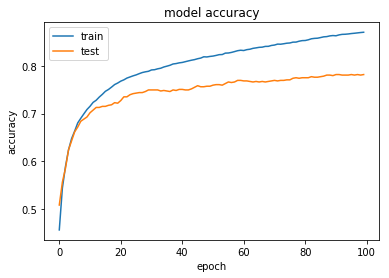

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Plotting Train and Test loss

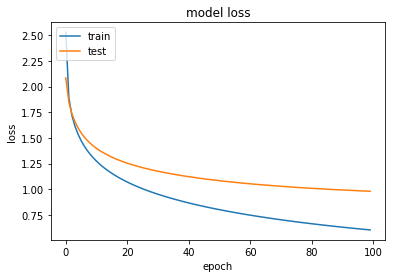

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Fully connected + Dropout + Relu + Relu + Dropout + Fully connected + Softmax (MLP)

In [43]:
model = Sequential()

model.add(Dense(input_shape=(max_words,), units=500))
model.add(Dropout(0.5))
model.add(Activation('relu'))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))

model.add(Activation('softmax'))
# Without Dropout (epochs=100)
# Max_accuracy = 90.63, Val_accuracy =  77.09
# Test_score = 0.985, Test_accuracy = 76.68
# With Dropout (epochs= 100)
# Max_accuracy = 85.98, Val_accuracy =  76.08
# Test_score = 1.036, Test_accuracy = 76.22
# With Dropout (epochs= 500)
# Max_accuracy = 94.84, Val_accuracy =  79.20
# Test_score = 1.13, Test_accuracy = 79.07

"\n\nmodel = Sequential()\nmodel.add(Dense(input_shape=(max_words,), units=512))\nmodel.add(Activation('relu'))\nmodel.add(Dense(num_classes))\nmodel.add(Activation('softmax'))\n# Max_accuracy = 86.51, Val_accuracy =  78.31\n# Test_score = 0.9231, Test_accuracy = 77.82\n"

In [44]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
          epochs=nb_epoch, 
          batch_size=batch_size, 
          validation_split=0.1, 
          verbose=2)

score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=2)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 8083 samples, validate on 899 samples
Epoch 1/100
2s - loss: 2.5279 - acc: 0.4302 - val_loss: 1.9487 - val_acc: 0.5139
Epoch 2/100
2s - loss: 1.9254 - acc: 0.5239 - val_loss: 1.7415 - val_acc: 0.5784
Epoch 3/100
2s - loss: 1.7674 - acc: 0.5649 - val_loss: 1.6371 - val_acc: 0.6307
Epoch 4/100
2s - loss: 1.6650 - acc: 0.5969 - val_loss: 1.5644 - val_acc: 0.6618
Epoch 5/100
2s - loss: 1.5774 - acc: 0.6250 - val_loss: 1.5062 - val_acc: 0.6885
Epoch 6/100
2s - loss: 1.5110 - acc: 0.6442 - val_loss: 1.4610 - val_acc: 0.6952
Epoch 7/100
2s - loss: 1.4686 - acc: 0.6569 - val_loss: 1.4197 - val_acc: 0.6997
Epoch 8/100
2s - loss: 1.4147 - acc: 0.6726 - val_loss: 1.3835 - val_acc: 0.7063
Epoch 9/100
2s - loss: 1.3724 - acc: 0.6817 - val_loss: 1.3551 - val_acc: 0.7063
Epoch 10/100
2s - loss: 1.3384 - acc: 0.6881 - val_loss: 1.3291 - val_acc: 0.7097
Epoch 11/100
2s - loss: 1.3013 - acc: 0.6966 - val_loss: 1.3073 - val_acc: 0.7130
Epoch 12/100
2s - loss: 1.2678 - acc: 0.7073 - val_loss: 1.2

In [27]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


## Plotting Train and Test accuarcy

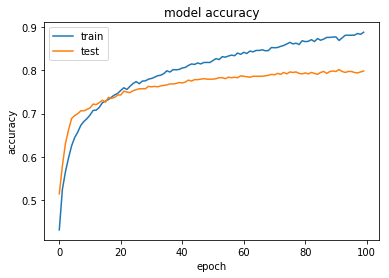

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Plotting Train and Test loss

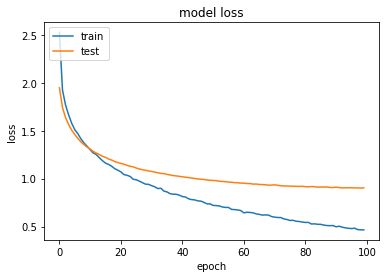

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Fully connected + RELU + Fully connected + Softmax (MLP)

In [47]:
model = Sequential()
model.add(Dense(input_shape=(max_words,), units=512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
# Max_accuracy = 86.51, Val_accuracy =  78.31
# Test_score = 0.9231, Test_accuracy = 77.82

In [48]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
          epochs=nb_epoch, 
          batch_size=batch_size, 
          validation_split=0.1, 
          verbose=2)

score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=2)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 8083 samples, validate on 899 samples
Epoch 1/100
2s - loss: 2.3757 - acc: 0.4643 - val_loss: 1.9453 - val_acc: 0.5139
Epoch 2/100
2s - loss: 1.7606 - acc: 0.5666 - val_loss: 1.7325 - val_acc: 0.5918
Epoch 3/100
2s - loss: 1.5894 - acc: 0.6251 - val_loss: 1.6186 - val_acc: 0.6318
Epoch 4/100
2s - loss: 1.4730 - acc: 0.6651 - val_loss: 1.5299 - val_acc: 0.6719
Epoch 5/100
2s - loss: 1.3803 - acc: 0.6880 - val_loss: 1.4623 - val_acc: 0.6874
Epoch 6/100
2s - loss: 1.3052 - acc: 0.7056 - val_loss: 1.4076 - val_acc: 0.6941
Epoch 7/100
2s - loss: 1.2416 - acc: 0.7229 - val_loss: 1.3631 - val_acc: 0.7019
Epoch 8/100
2s - loss: 1.1872 - acc: 0.7345 - val_loss: 1.3342 - val_acc: 0.7041
Epoch 9/100
2s - loss: 1.1398 - acc: 0.7429 - val_loss: 1.2992 - val_acc: 0.7075
Epoch 10/100
2s - loss: 1.0981 - acc: 0.7541 - val_loss: 1.2678 - val_acc: 0.7186
Epoch 11/100
2s - loss: 1.0596 - acc: 0.7627 - val_loss: 1.2492 - val_acc: 0.7186
Epoch 12/100
1s - loss: 1.0247 - acc: 0.7710 - val_loss: 1.2

## Plotting Train and Test accuracy

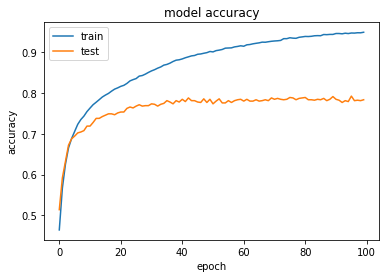

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Plotting Train and Test loss

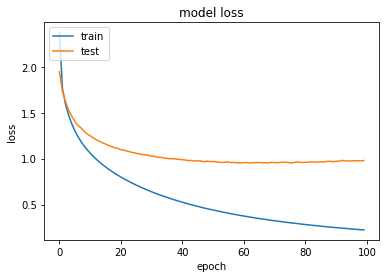

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Conclusion

MLP with Dropout is giving the best results at the moment (though it is overfitting)

## TODO
1. Batch normalization
2. Learning rate decay
3. Train on more number of epochs (1000 - 10000)